In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('air quality data.csv')

In [5]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
df.shape

(29531, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [8]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [9]:
df.duplicated().sum()

0

In [10]:
df1= df.dropna(subset=['AQI'],inplace=True)

In [11]:
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


In [12]:
df.shape

(24850, 16)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [14]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [15]:
null_values_percentage

,0
Xylene,61.859155
PM10,28.515091
NH3,26.301811
Toluene,23.444668
Benzene,14.225352
NOx,7.472837
O3,3.247485
PM2.5,2.728370
SO2,2.434608
CO,1.790744


In [16]:
df.to_csv("AQI_cleared_dataset.csv",index=False)

In [17]:
sampled_data = df.sample(n=500, random_state=42)

In [18]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 8450 to 20645
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        500 non-null    object 
 1   Date        500 non-null    object 
 2   PM2.5       486 non-null    float64
 3   PM10        348 non-null    float64
 4   NO          490 non-null    float64
 5   NO2         492 non-null    float64
 6   NOx         465 non-null    float64
 7   NH3         369 non-null    float64
 8   CO          492 non-null    float64
 9   SO2         483 non-null    float64
 10  O3          484 non-null    float64
 11  Benzene     415 non-null    float64
 12  Toluene     372 non-null    float64
 13  Xylene      172 non-null    float64
 14  AQI         500 non-null    float64
 15  AQI_Bucket  500 non-null    object 
dtypes: float64(13), object(3)
memory usage: 66.4+ KB


In [19]:
city_counts = sampled_data['City'].value_counts()
cities = city_counts.index
counts = city_counts.values

([<matplotlib.patches.Wedge at 0x78f757f97df0>,
 [Text(-0.3399186987098806, 1.0461621663333949, 'Bengaluru'),
  Text(-0.8691705275003083, 0.6741977411151984, 'Lucknow'),
  Text(-1.0929724450821594, 0.12414199245672736, 'Chennai'),
  Text(-1.0252782134809453, -0.3985029296772124, 'Delhi'),
  Text(-0.7875301149299797, -0.7679819777041471, 'Gurugram'),
  Text(-0.46835719928842656, -0.9953097677982976, 'Ahmedabad'),
  Text(-0.10351911030202465, -1.0951181643102617, 'Patna'),
  Text(0.26014893855443766, -1.0687948960249574, 'Amritsar'),
  Text(0.5894095170857544, -0.9287606910118117, 'Hyderabad'),
  Text(0.8431423424811137, -0.7064778767346225, 'Visakhapatnam'),
  Text(0.9982328882380435, -0.4620942553634853, 'Kolkata'),
  Text(1.0791995773404885, -0.21290437352978683, 'Mumbai'),
  Text(1.0994572150112643, 0.03455187924954498, 'Thiruvananthapuram'),
  Text(1.0687948929803446, 0.2601489510629129, 'Amaravati'),
  Text(0.9953097294288747, 0.4683572808275968, 'Brajrajnagar'),
  Text(0.893963538

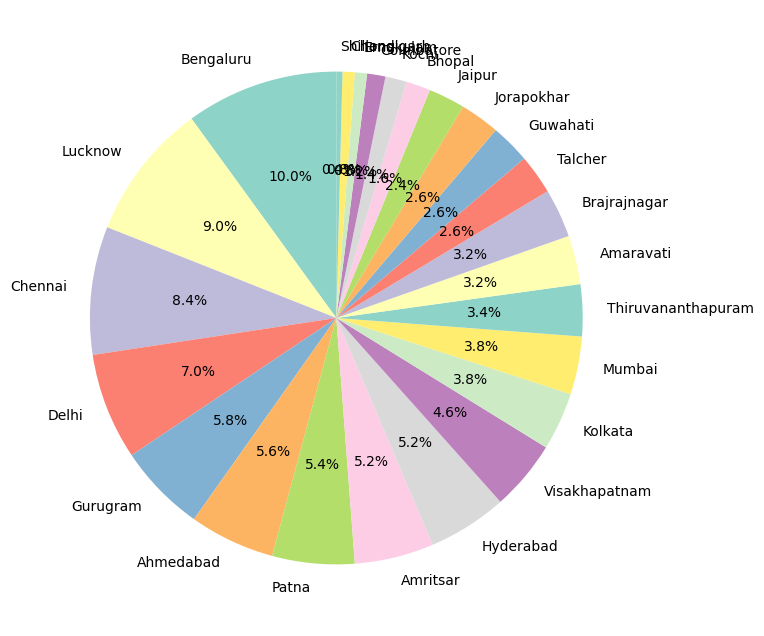

In [20]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('Set3', len(cities))
plt.pie(counts, labels=cities, autopct='%1.1f%%', startangle=90, colors=colors)

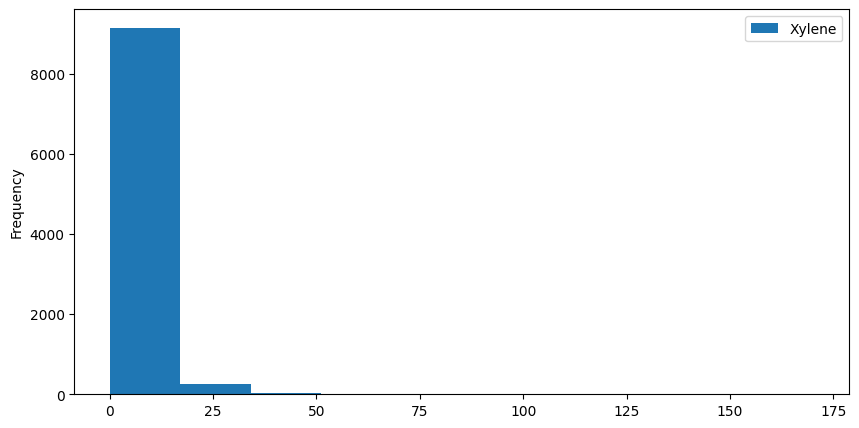

In [21]:
df['Xylene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

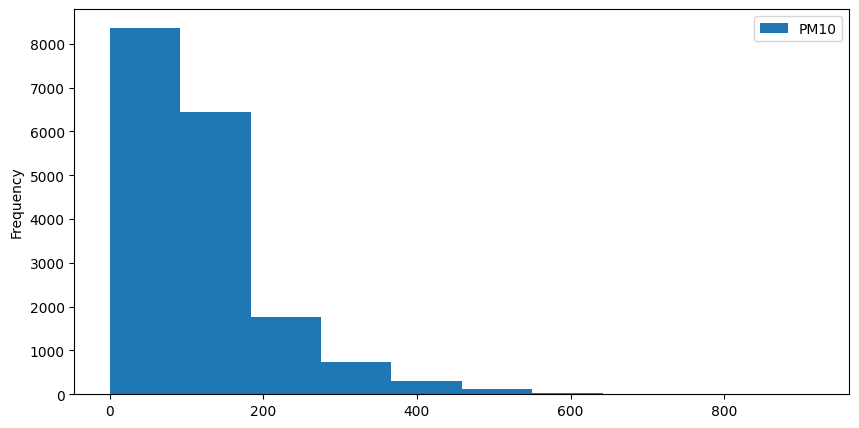

In [22]:
df['PM10'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

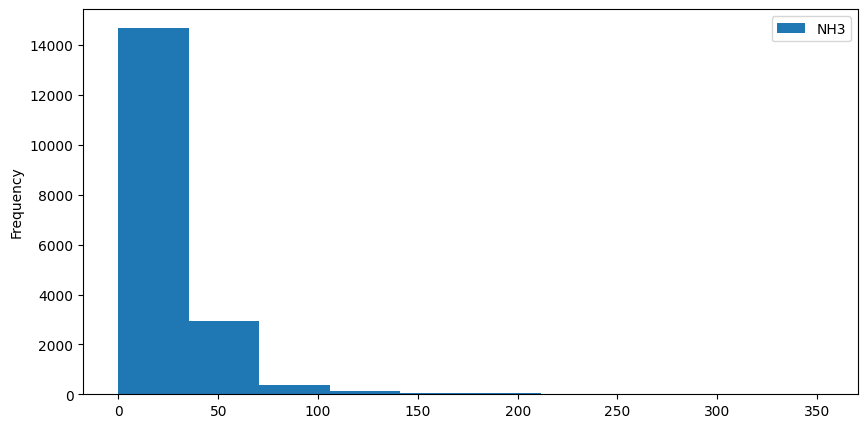

In [23]:
df['NH3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

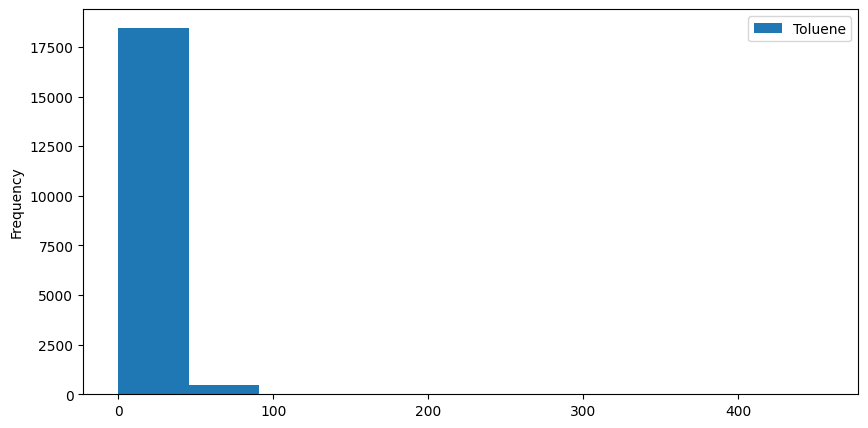

In [24]:
df['Toluene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

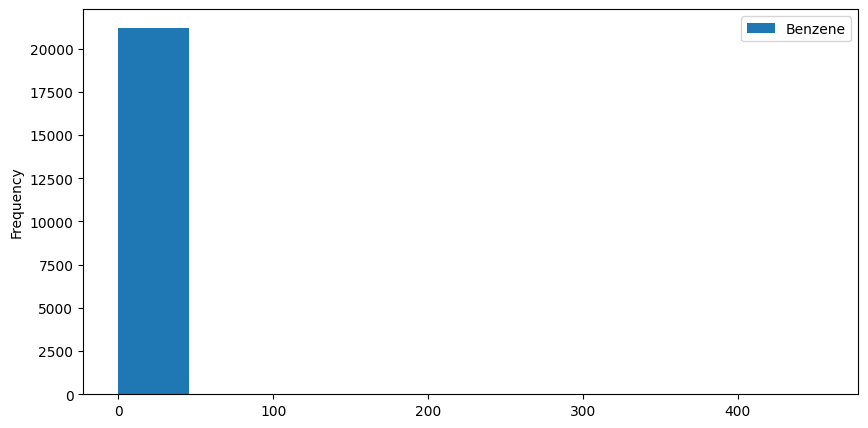

In [25]:
df['Benzene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

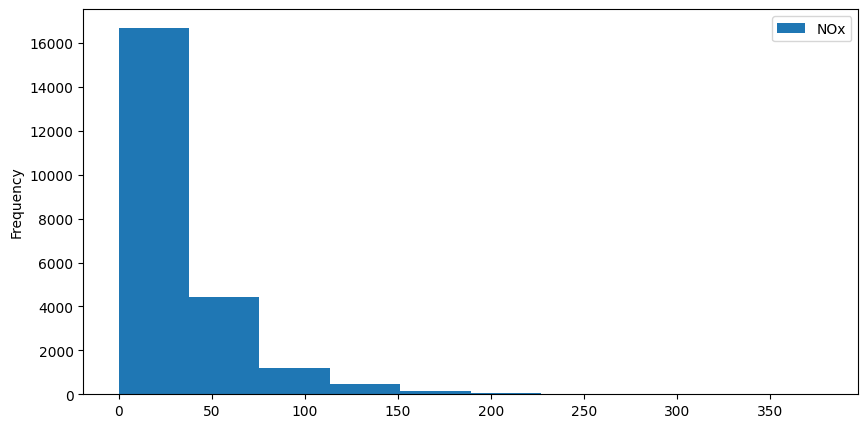

In [26]:
df['NOx'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

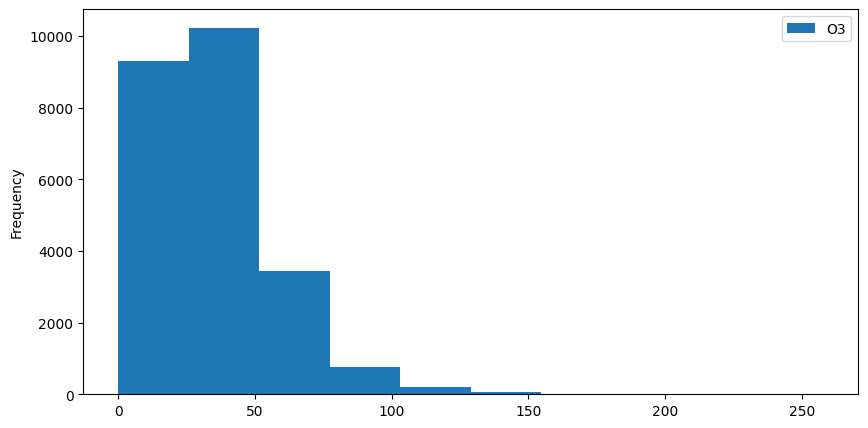

In [27]:
df['O3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

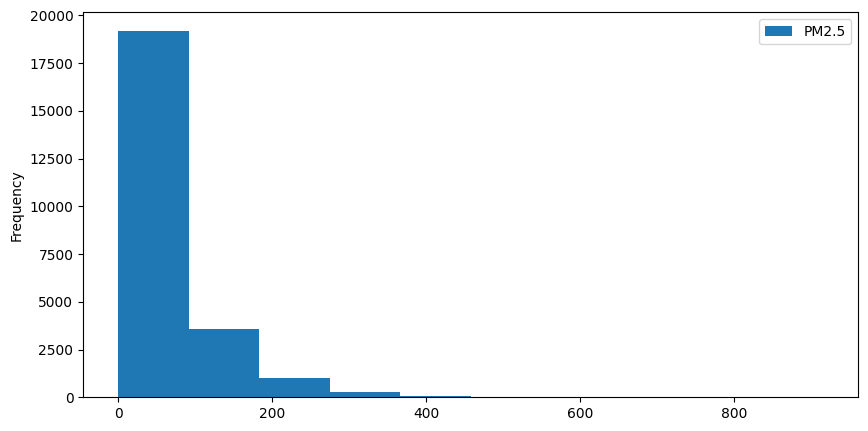

In [28]:
df['PM2.5'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

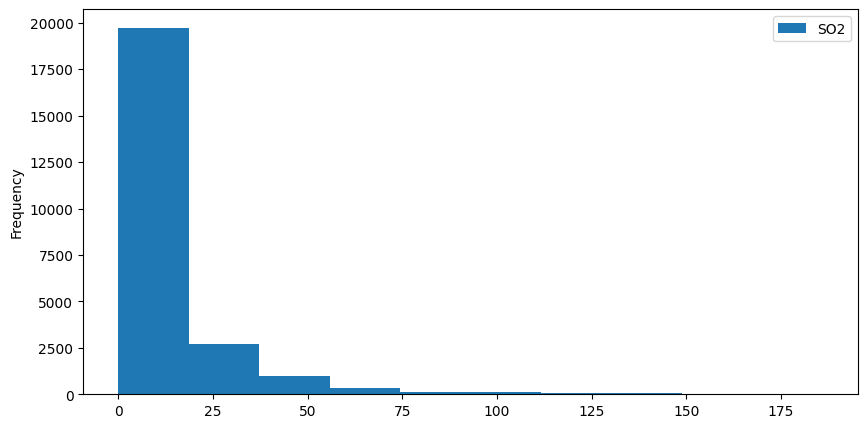

In [29]:
df['SO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

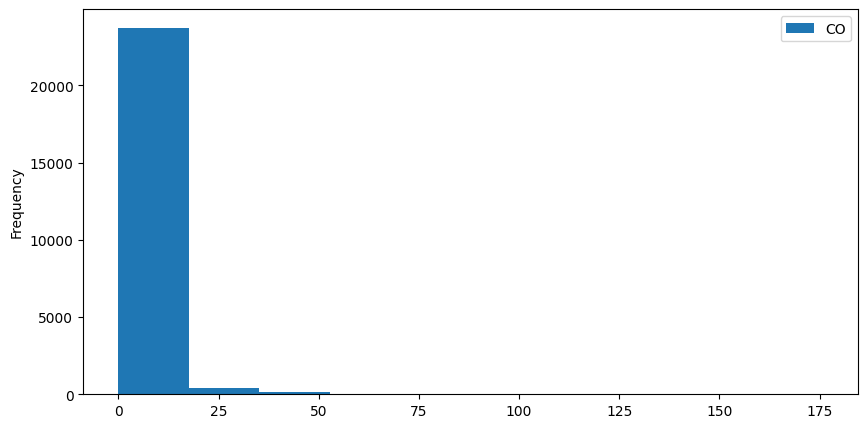

In [30]:
df['CO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

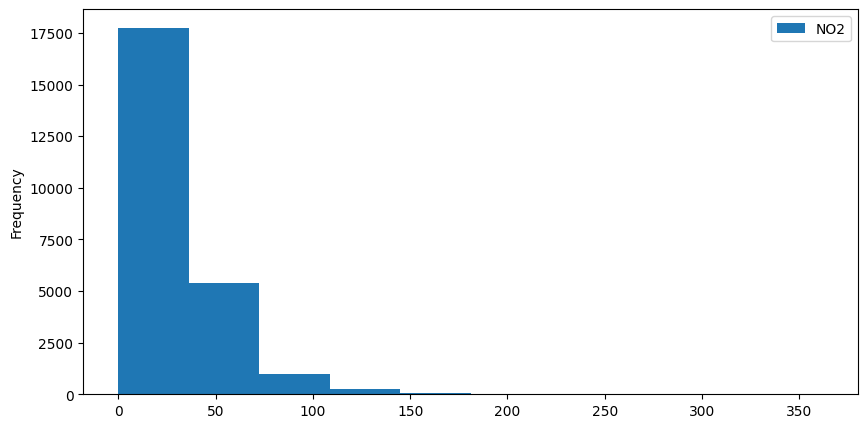

In [31]:
df['NO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

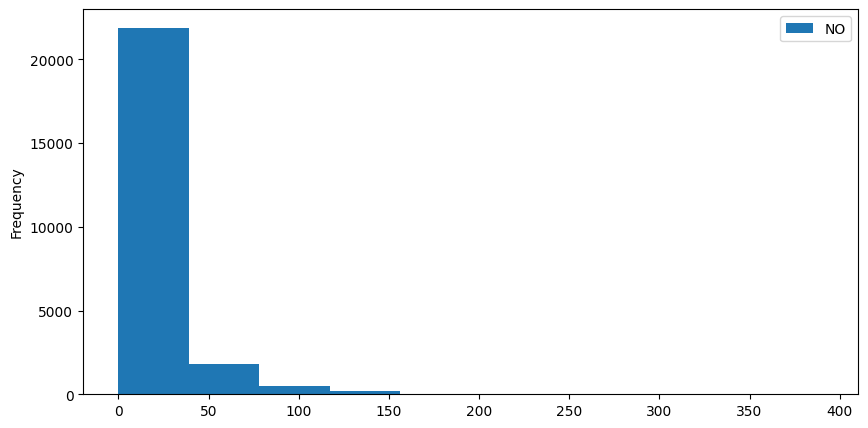

In [32]:
df['NO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

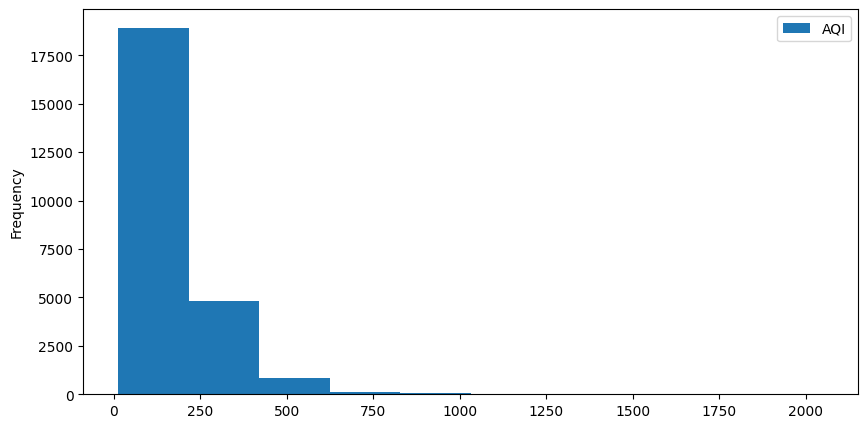

In [33]:
df['AQI'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

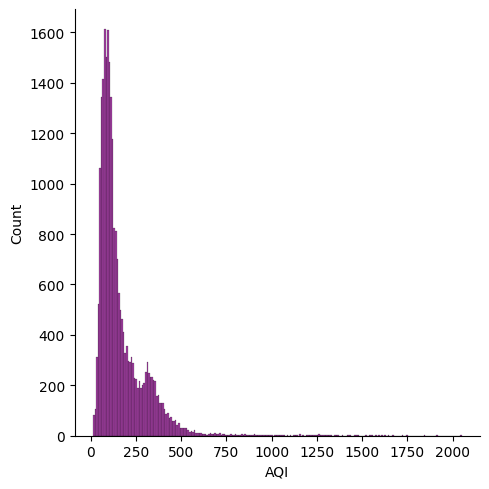

In [34]:
# distribution of aqi from 2015-2020
sns.displot(df, x="AQI", color="purple")
plt.show()

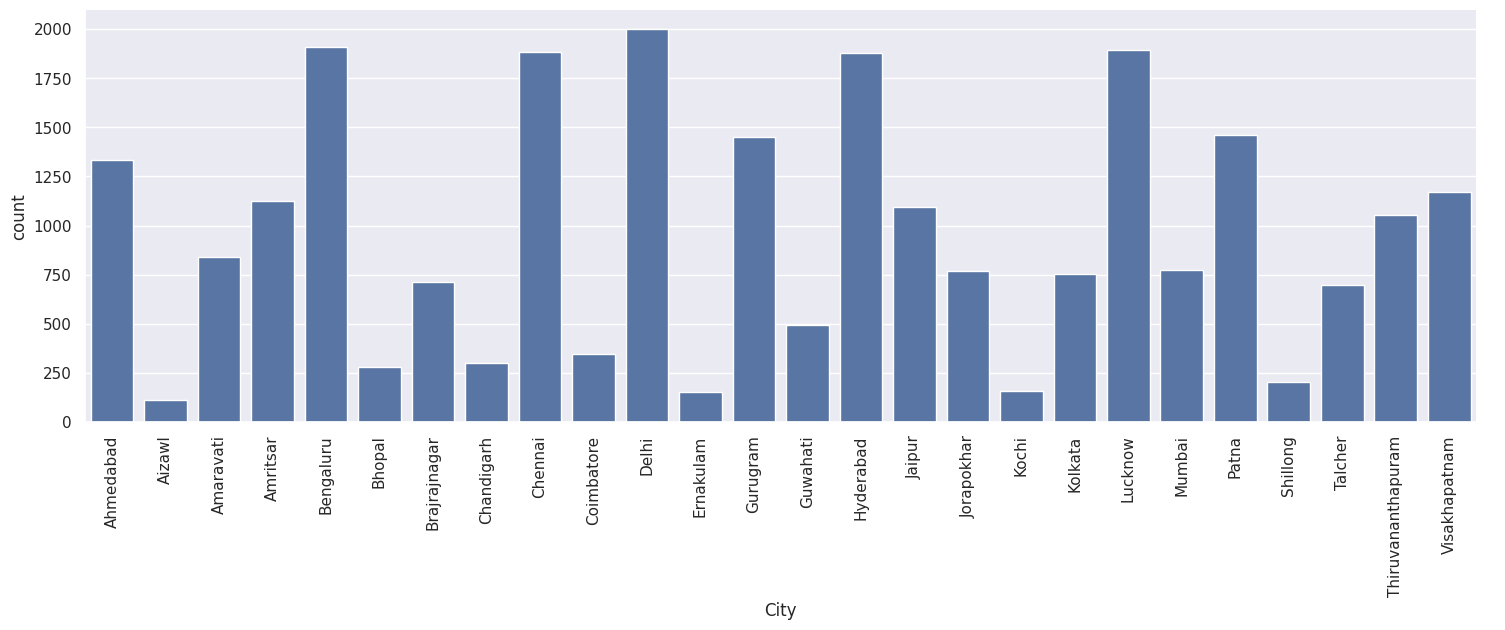

In [35]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=df,height=5,aspect=3)
graph.set_xticklabels(rotation=90)

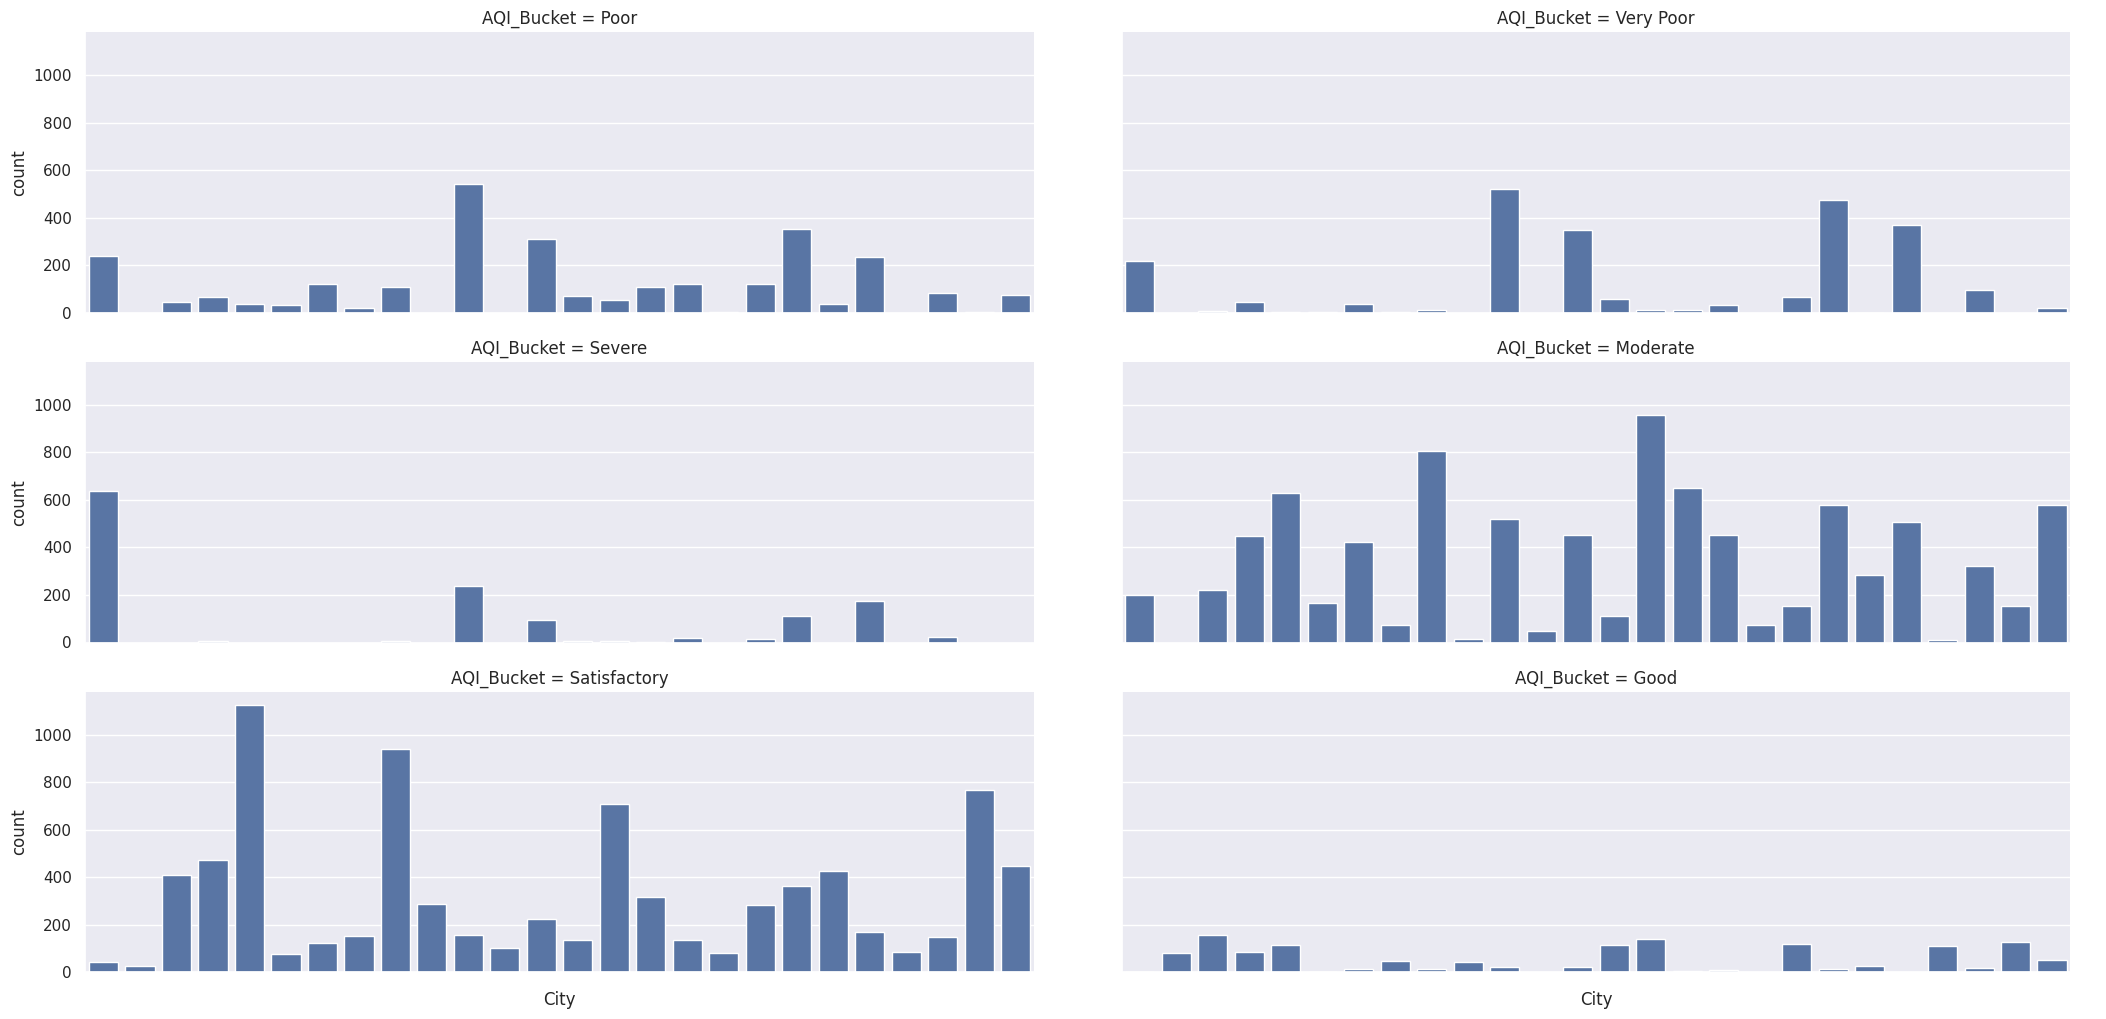

In [36]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=df,col="AQI_Bucket",col_wrap=2,height=3.5,aspect=3)
graph.set_xticklabels(rotation=90)

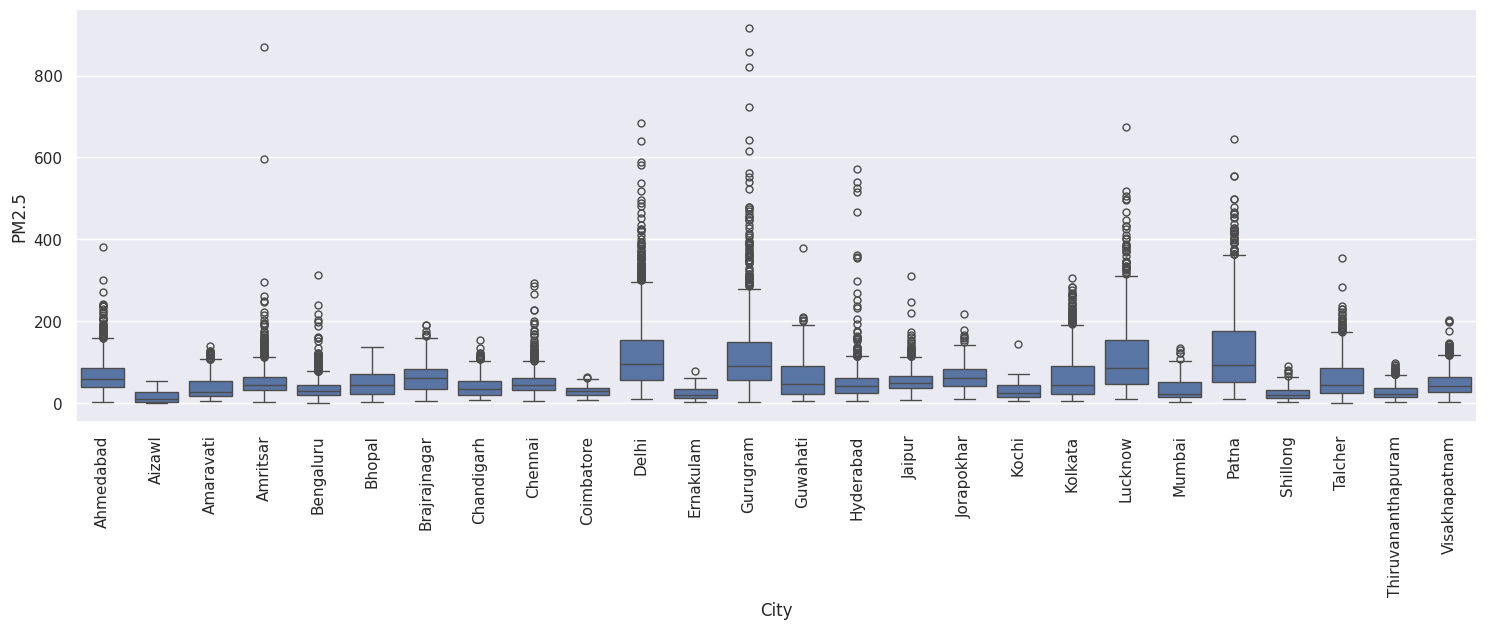

In [37]:
graph1=sns.catplot(x="City",y="PM2.5",kind="box",data=df,height=5,aspect=3)
graph1.set_xticklabels(rotation=90)

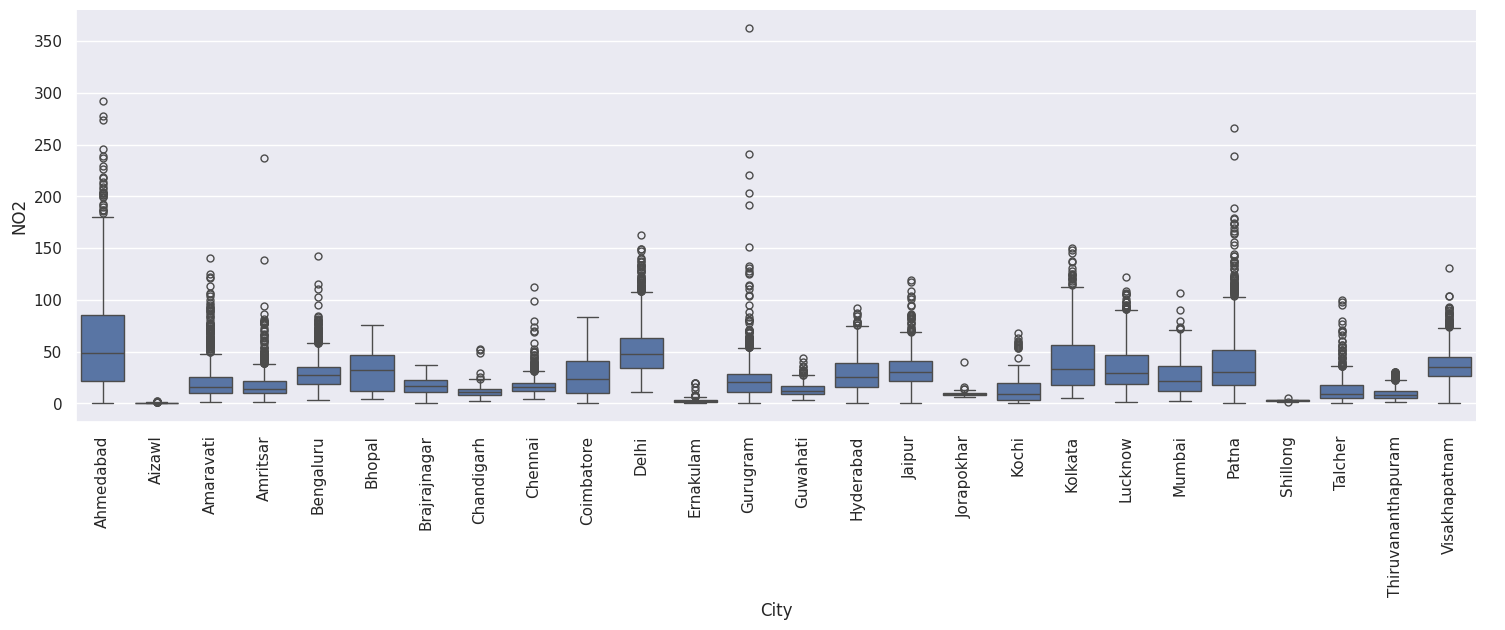

In [38]:
graph2=sns.catplot(x="City",y="NO2",kind="box",data=df,height=5,aspect=3)
graph2.set_xticklabels(rotation=90)

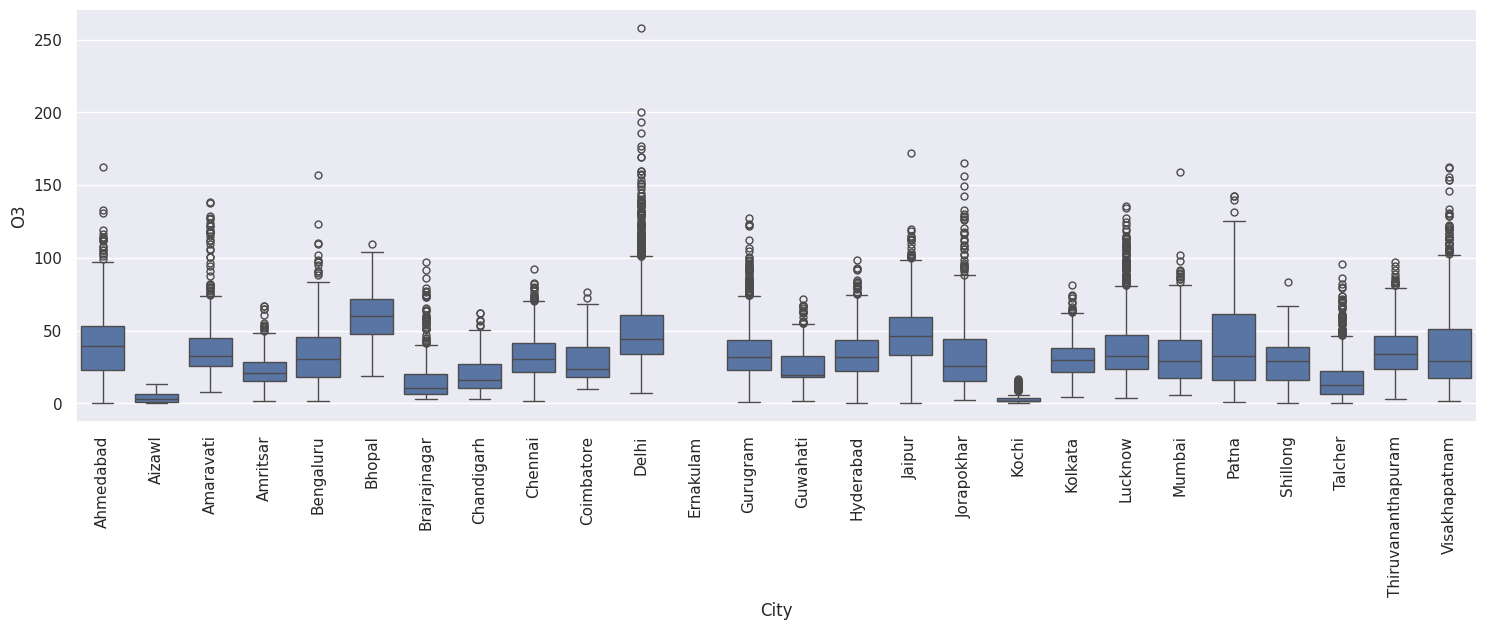

In [39]:
graph3=sns.catplot(x="City",y="O3",data=df,kind="box",height=5,aspect=3)
graph3.set_xticklabels(rotation=90)

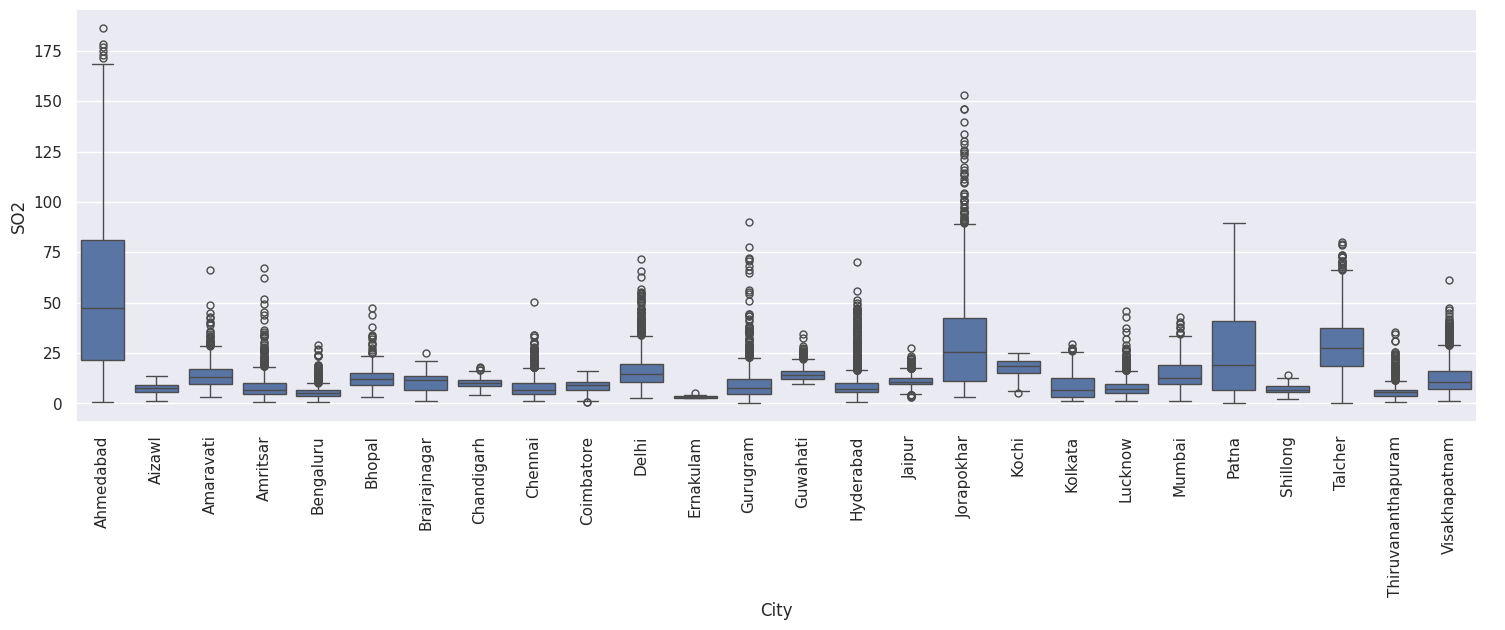

In [40]:
graph4=sns.catplot(x="City",y="SO2",data=df,kind="box",height=5,aspect=3)
graph4.set_xticklabels(rotation=90)

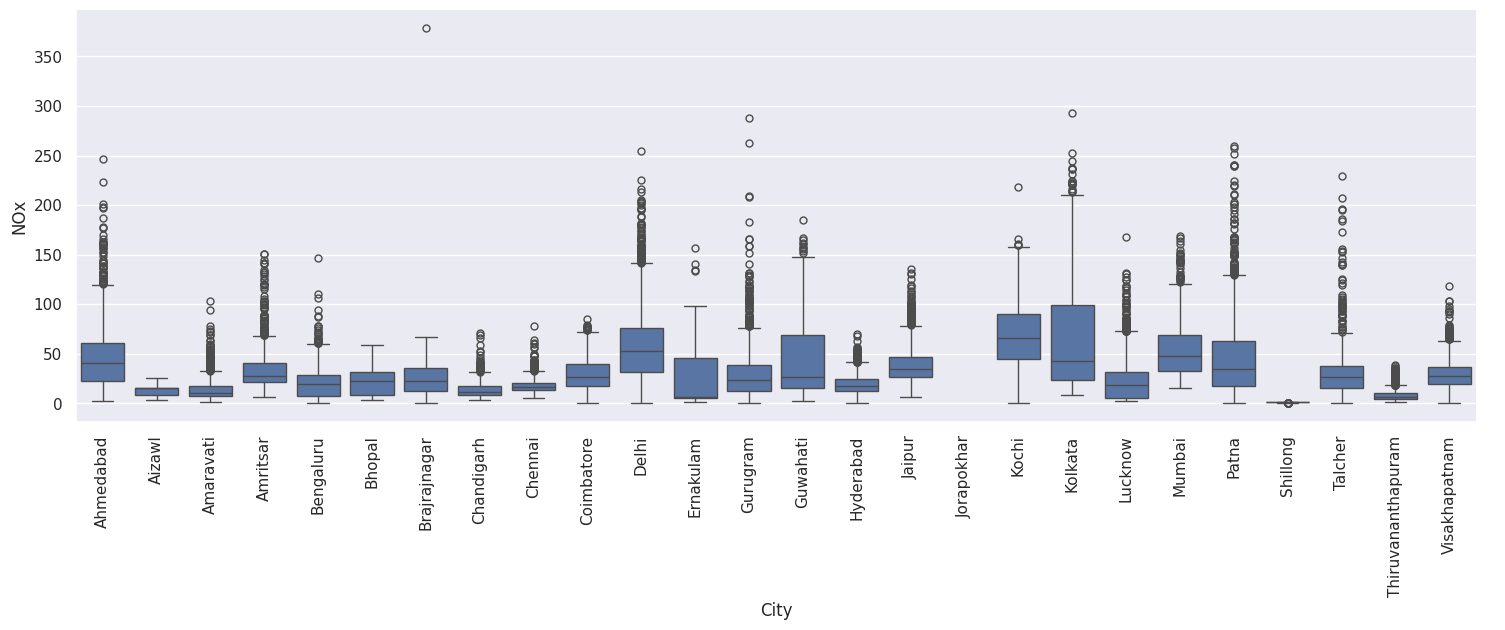

In [41]:
graph4=sns.catplot(x="City",y="NOx",data=df,kind="box",height=5,aspect=3)
graph4.set_xticklabels(rotation=90)

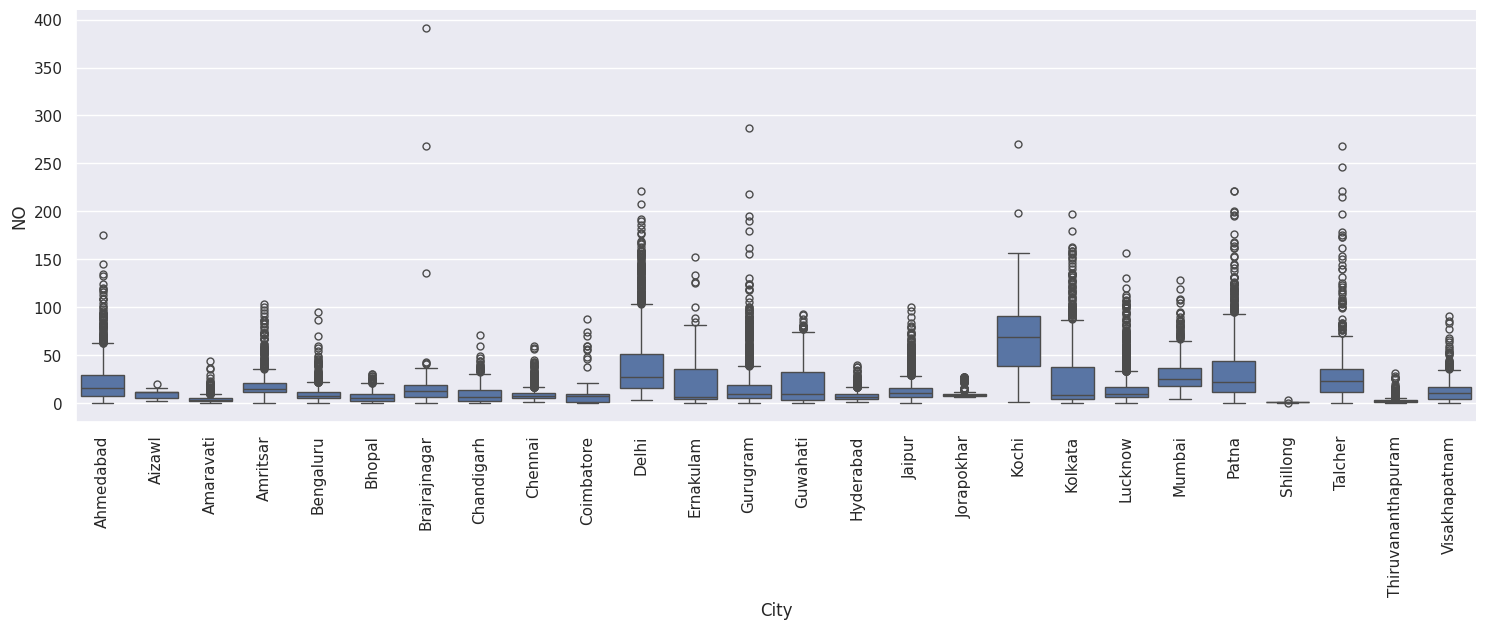

In [42]:
graph4=sns.catplot(x="City",y="NO",data=df,kind="box",height=5,aspect=3)
graph4.set_xticklabels(rotation=90)

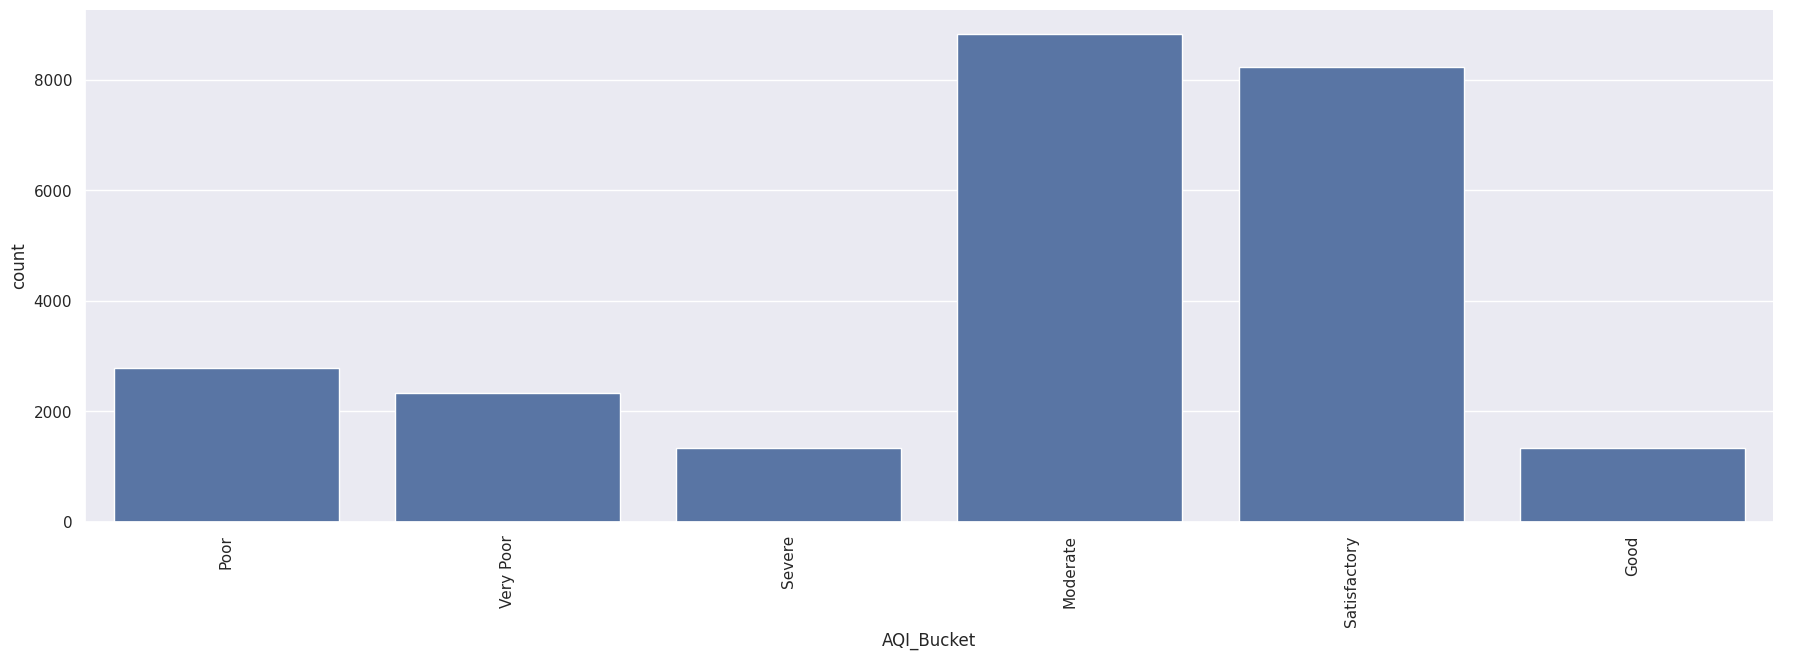

In [43]:
graph7=sns.catplot(x="AQI_Bucket",data=df,kind="count",height=6,aspect=3)
graph7.set_xticklabels(rotation=90)

#### Checking all null values and treating those null values.

In [44]:
# Checking all null values

df.isnull().sum().sort_values(ascending=False)

# higher null values present in PM10 followed by NH3

,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


In [45]:
df.describe().loc["mean"]

,mean
PM2.5,67.476613
PM10,118.454435
NO,17.622421
NO2,28.978391
NOx,32.289012
NH3,23.848366
CO,2.345267
SO2,14.362933
O3,34.912885
Benzene,3.458668


In [46]:
df = df.replace({

"PM2.5" : {np.nan:67.476613},
"PM10" :{np.nan:118.454435},
"NO": {np.nan:17.622421},
"NO2": {np.nan:28.978391},
"NOx": {np.nan:32.289012},
"NH3": {np.nan:23.848366},
"CO":  {np.nan:2.345267},
"SO2": {np.nan:34.912885},
"O3": {np.nan:38.320547},
"Benzene": {np.nan:3.458668},
"Toluene": {np.nan:9.525714},
"Xylene": {np.nan:3.588683}})


In [47]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


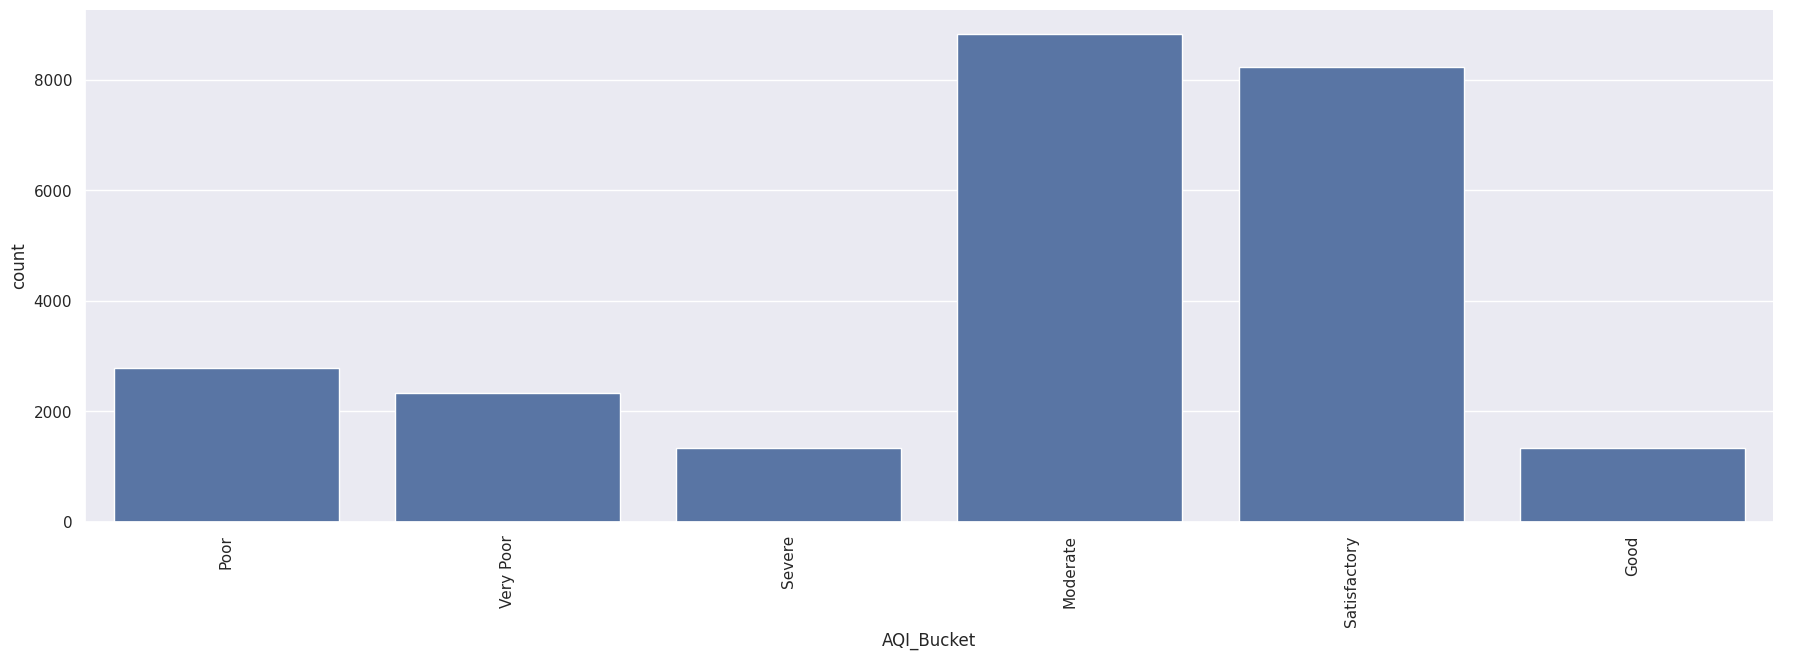

In [48]:
graph=sns.catplot(x="AQI_Bucket",data=df,kind="count",height=6,aspect=3)
graph.set_xticklabels(rotation=90)

We delete AQI_Bucket from the dataset because it is not a feature that affects air quality

In [49]:
df = df.drop(["AQI_Bucket"], axis=1)

In [50]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


<Axes: >

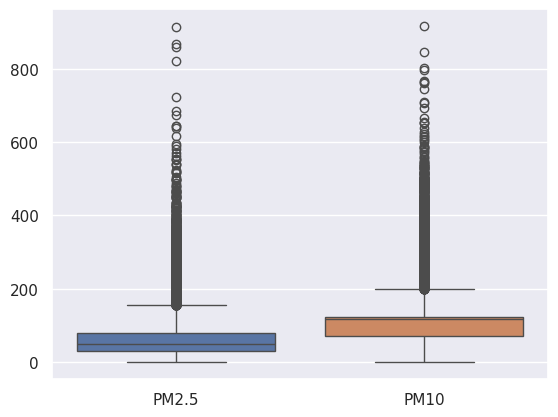

In [51]:
sns.boxplot(data=df[[ 'PM2.5', 'PM10']])

<Axes: >

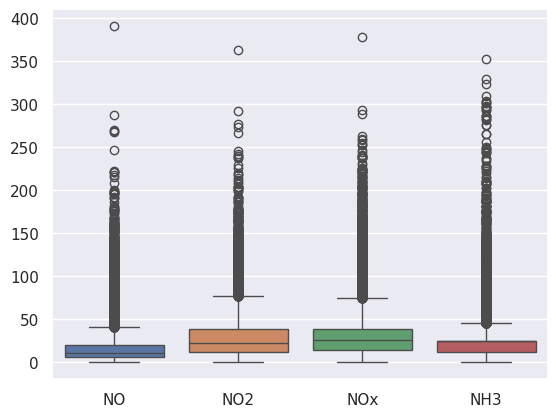

In [52]:
sns.boxplot(data=df[[ 'NO', 'NO2', 'NOx','NH3']])

<Axes: >

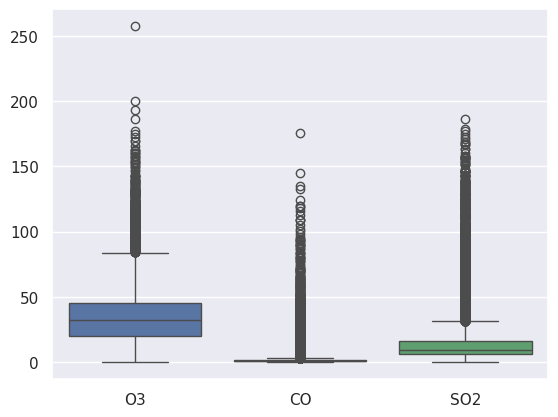

In [53]:
sns.boxplot(data=df[[ 'O3', 'CO', 'SO2']])

<Axes: >

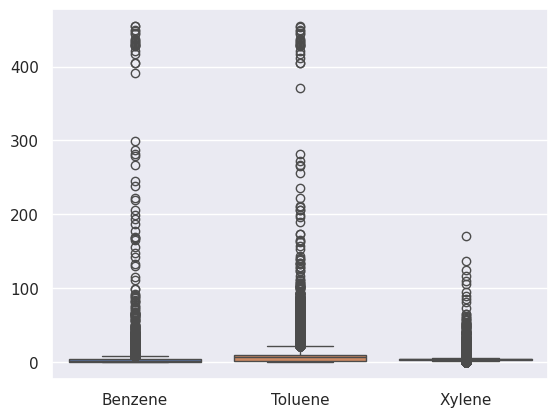

In [54]:
sns.boxplot(data=df[[ 'Benzene', 'Toluene', 'Xylene']])

In [55]:
# This function takes a DataFrame as a parameter and identifies outliers for numeric columns in the DataFrame.
#It replaces these outliers with the corresponding quartile values ​​(Q1 or Q3). Outliers are identified using the interquartile range (IQR).
def replace_outliers_with_quartiles(df):

    for column in df.select_dtypes(include=['number']).columns: # Used to cycle through all numeric columns in the DataFrame.
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # To identify outliers, lower and upper limits are calculated and values ​​outside these limits are considered outliers.
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # For each column, we identify outliers and replace them with Q1 or Q3. We do this using a lambda function.
        #If the value is less than the lower bound, it is replaced with Q1. If it is greater than the upper bound,
        #it is replaced with Q3. In the last case, the value is not changed and remains the same.
        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )

    return df

df = replace_outliers_with_quartiles(df)

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24850.0,55.174281,31.829575,0.04,29.56,50.165000,79.505625,154.30
PM10,24850.0,101.351323,39.079916,0.03,71.78,118.454435,122.955625,199.70
NO,24850.0,12.507694,8.762015,0.03,5.72,10.075000,19.710000,40.68
NO2,24850.0,25.901114,16.669494,0.01,12.09,22.535000,37.910000,76.62
NOx,24850.0,26.574513,16.138682,0.00,14.03,25.720000,38.170000,74.38
NH3,24850.0,19.486584,9.630370,0.01,11.28,23.848366,24.710000,44.85
CO,24850.0,1.040507,0.615436,0.00,0.59,0.950000,1.530000,2.94
SO2,24850.0,10.616411,6.091530,0.01,5.79,9.430000,15.940000,31.16
O3,24850.0,33.288444,17.509123,0.01,19.64,32.060000,45.395625,83.99
Benzene,24850.0,2.098520,1.828135,0.00,0.34,1.810000,3.458668,8.13


<Axes: >

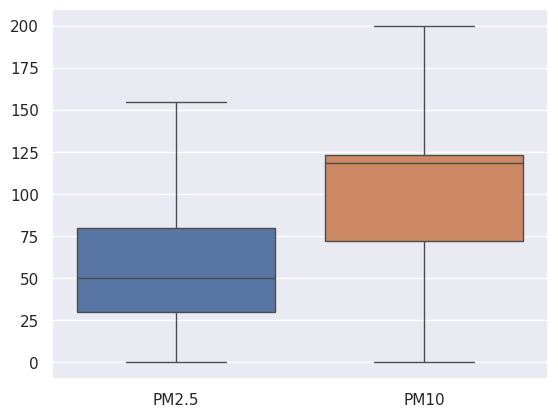

In [57]:
sns.boxplot(data=df[[ 'PM2.5', 'PM10']])

<Axes: >

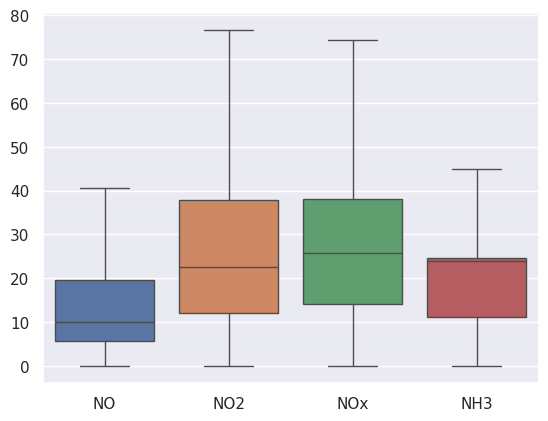

In [58]:
sns.boxplot(data=df[[ 'NO', 'NO2', 'NOx','NH3']])

<Axes: >

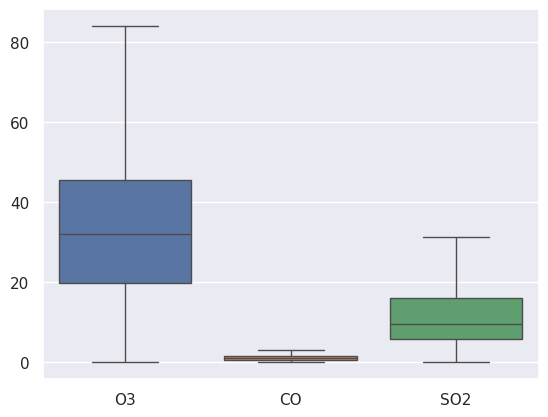

In [59]:
sns.boxplot(data=df[[ 'O3', 'CO', 'SO2']])

<Axes: >

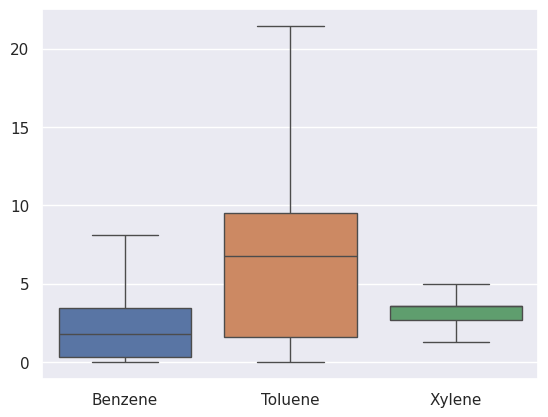

In [60]:
sns.boxplot(data=df[[ 'Benzene', 'Toluene', 'Xylene']])

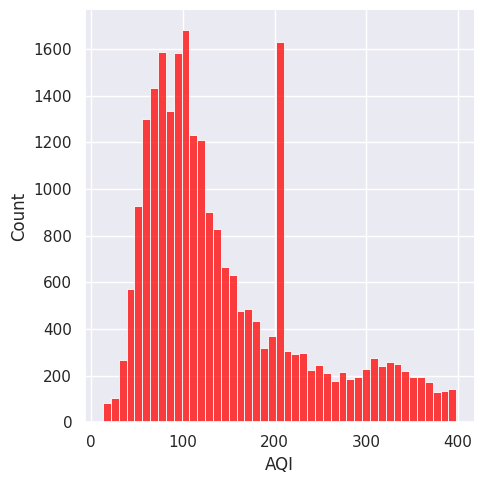

In [61]:
# distribution of aqi from 2015-2020
sns.displot(df, x="AQI", color="red")
plt.show()

In [62]:
df1=df.drop(columns=['City'])

#### Multivariate analysis

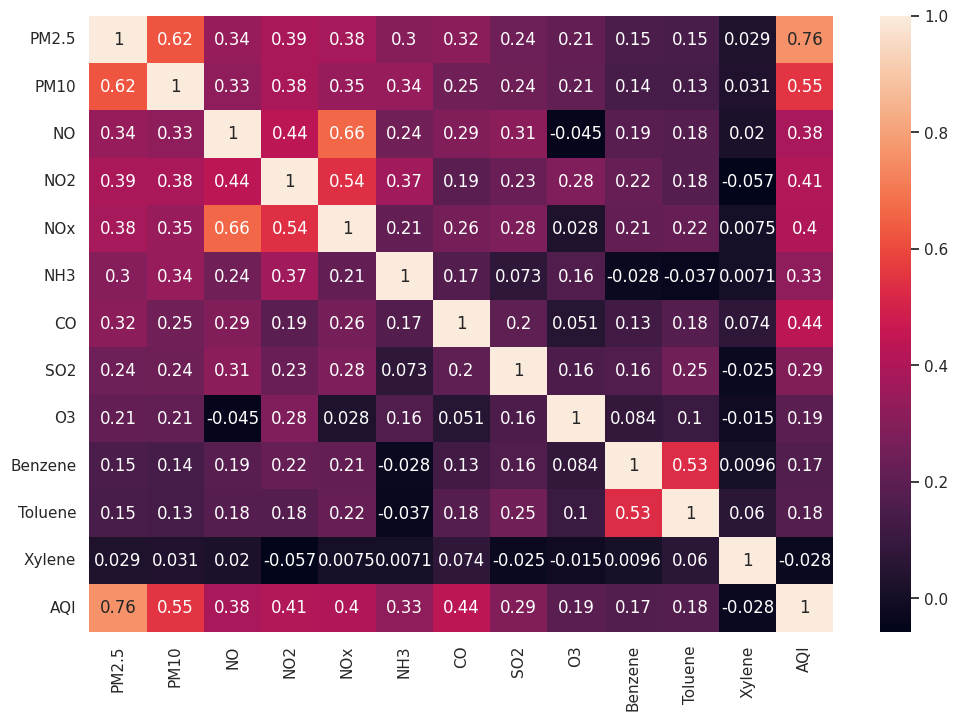

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Date' is the column containing date strings
# Convert 'Date' column to datetime objects
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract numerical features for correlation
numerical_features = df1.select_dtypes(include=['number']).columns
correlation_matrix = df1[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [64]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,15.94,59.7600,0.020000,0.000000,3.140000,209.0
29,Ahmedabad,2015-01-30,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,15.94,45.3975,0.040000,0.000000,4.810000,328.0
30,Ahmedabad,2015-01-31,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,15.94,45.3975,0.240000,0.010000,3.588683,208.0
31,Ahmedabad,2015-02-01,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,15.94,45.3975,0.400000,0.040000,3.588683,208.0
32,Ahmedabad,2015-02-02,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,15.94,45.3975,0.460000,0.060000,3.588683,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.0200,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.3000,2.240000,12.070000,2.650000,41.0
29527,Visakhapatnam,2020-06-28,24.3800,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.1400,0.740000,2.210000,2.650000,70.0
29528,Visakhapatnam,2020-06-29,22.9100,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.9600,0.010000,0.010000,2.650000,68.0
29529,Visakhapatnam,2020-06-30,16.6400,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.3000,0.000000,0.000000,2.650000,54.0


In [65]:
# Dropping unnecessary columns
df.drop(['Date'],axis=1,inplace=True)
df.drop(['City'],axis=1,inplace=True)

In [66]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,15.94,59.7600,0.020000,0.000000,3.140000,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,15.94,45.3975,0.040000,0.000000,4.810000,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,15.94,45.3975,0.240000,0.010000,3.588683,208.0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,15.94,45.3975,0.400000,0.040000,3.588683,208.0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,15.94,45.3975,0.460000,0.060000,3.588683,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.0200,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.3000,2.240000,12.070000,2.650000,41.0
29527,24.3800,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.1400,0.740000,2.210000,2.650000,70.0
29528,22.9100,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.9600,0.010000,0.010000,2.650000,68.0
29529,16.6400,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.3000,0.000000,0.000000,2.650000,54.0


In [67]:
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler().fit_transform(df)

In [68]:
df1

array([[ 0.87831149,  0.43765334, -0.63658947, ..., -1.32511601,
        -0.29450027,  0.70999757],
       [ 0.77494642,  0.43765334,  0.15319907, ..., -1.32511601,
         2.69513707,  2.07124258],
       [ 1.23616198,  0.43765334,  1.35614288, ..., -1.32298652,
         0.50873294,  0.69855854],
       ...,
       [-1.01367767, -0.91151782, -1.03376636, ..., -1.32298652,
        -1.17169925, -0.90290618],
       [-1.21066824, -1.31480214, -0.96528759, ..., -1.32511601,
        -1.17169925, -1.06305265],
       [-1.26219369, -0.90460877, -1.3818668 , ...,  0.70336955,
         0.50873294, -1.10880878]])

In [69]:
df = pd.DataFrame(df1,columns = df.columns)

In [70]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.878311,0.437653,-0.636589,0.168508,0.442764,0.452929,0.795376,0.873951,1.511903,-1.136985,-1.325116,-0.294500,0.709998
1,0.774946,0.437653,0.153199,0.166708,0.898821,0.452929,0.795376,0.873951,0.691599,-1.126045,-1.325116,2.695137,2.071243
2,1.236162,0.437653,1.356143,0.405473,1.613267,0.452929,0.795376,0.873951,0.691599,-1.016642,-1.322987,0.508733,0.698559
3,2.539065,0.437653,0.822008,0.970588,0.718505,0.452929,0.795376,0.873951,0.691599,-0.929119,-1.316598,0.508733,0.698559
4,0.764500,0.437653,0.822008,0.564449,2.864324,0.452929,0.795376,0.873951,0.691599,-0.896298,-1.312339,0.508733,0.698559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,-1.261565,-1.289981,-0.550991,-0.050459,-0.435888,-0.728604,-0.927014,-0.339234,-0.570482,0.077392,1.245171,-1.171699,-1.211760
24846,-0.967493,-0.697593,-1.037190,0.009532,-0.622400,-0.778447,-0.845770,0.345337,-0.179821,-0.743133,-0.854500,-1.171699,-0.880028
24847,-1.013678,-0.911518,-1.033766,0.217701,-0.510864,-0.911363,-0.910766,-0.360575,-0.132987,-1.142455,-1.322987,-1.171699,-0.902906
24848,-1.210668,-1.314802,-0.965288,0.201503,-0.481741,-0.981974,-0.845770,-0.127460,-0.284911,-1.147926,-1.325116,-1.171699,-1.063053


Data Modeling

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [72]:
# Data Preparation for Modeling
x=df[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y=df["AQI"]

In [73]:
x.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0.878311,0.437653,-0.636589,0.168508,0.442764,0.452929,0.795376,0.873951,1.511903,-1.136985,-1.325116,-0.294500
1,0.774946,0.437653,0.153199,0.166708,0.898821,0.452929,0.795376,0.873951,0.691599,-1.126045,-1.325116,2.695137
2,1.236162,0.437653,1.356143,0.405473,1.613267,0.452929,0.795376,0.873951,0.691599,-1.016642,-1.322987,0.508733
3,2.539065,0.437653,0.822008,0.970588,0.718505,0.452929,0.795376,0.873951,0.691599,-0.929119,-1.316598,0.508733
4,0.764500,0.437653,0.822008,0.564449,2.864324,0.452929,0.795376,0.873951,0.691599,-0.896298,-1.312339,0.508733


In [74]:
y.head()

,AQI
0,0.709998
1,2.071243
2,0.698559
3,0.698559
4,0.698559


In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data

(19880, 12) (4970, 12) (19880,) (4970,)


Linear Regression

In [76]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [77]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [78]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  0.5912349545683131
RMSE TestData =  0.5831772714954147
--------------------------------------------------
RSquared value on train: 0.6513543609598098
RSquared value on test: 0.6562667641934443


K-nearest Neighbours

In [79]:
KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)

KNeighborsRegressor()

In [80]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [81]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  0.5912349545683131
RMSE TestData =  0.5831772714954147
--------------------------------------------------
RSquared value on train: 0.6513543609598098
RSquared value on test: 0.6562667641934443


Decision Tree Regressoor

In [82]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [83]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [84]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  0.029944869973786627
RMSE TestData =  0.5329534364912528
--------------------------------------------------
RSquared value on train: 0.9991056471481347
RSquared value on test: 0.7129226815288012


Random Forest Regressor

In [85]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [86]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [87]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.150281187913494
RMSE TestData =  0.38360325977437193
--------------------------------------------------
RSquared value on train: 0.9774745605932961
RSquared value on test: 0.8512746754751876


In [93]:
#import pandas as pd
#import numpy as np
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.impute import SimpleImputer


# Load your preprocessed data (replace 'your_preprocessed_data.csv' with your actual file)
try:
    df = pd.read_csv('AQI_cleared_dataset.csv')
except FileNotFoundError:
    print("Error: 'AQI_cleared_dataset.csv' not found. Please make sure the file exists and is in the correct location.")
    exit()




# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
X_train = imputer.fit_transform(X_train)  # Fit and transform on training data
X_test = imputer.transform(X_test)  # Transform test data using the trained imputer


# Function to evaluate model
def evaluate_model(model, model_name):
  model.fit(X_train, Y_train)
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)
  rmse_train = np.sqrt(mean_squared_error(Y_train, train_pred))
  rmse_test = np.sqrt(mean_squared_error(Y_test, test_pred))
  r2_train = r2_score(Y_train, train_pred)
  r2_test = r2_score(Y_test, test_pred)

  print(f"Model: {model_name}")
  print(f"RMSE (Training): {rmse_train}")
  print(f"RMSE (Testing): {rmse_test}")
  print(f"R-squared (Training): {r2_train}")
  print(f"R-squared (Testing): {r2_test}")
  print("-" * 50)
  return rmse_test, r2_test

# Model training and evaluation

models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

results = []
for name, model in models.items():
  rmse, r2 = evaluate_model(model, name)
  results.append([name, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "R-squared"])
print(results_df)

#Find best model based on RMSE
best_model_rmse = results_df.loc[results_df['RMSE'].idxmin()]
print(f"\nBest model based on RMSE: {best_model_rmse['Model']} with RMSE of {best_model_rmse['RMSE']}")

#Find best model based on R-squared
best_model_r2 = results_df.loc[results_df['R-squared'].idxmax()]
print(f"\nBest model based on R-squared: {best_model_r2['R-squared']}")

Model: Linear Regression
RMSE (Training): 54.0086052800841
RMSE (Testing): 56.50371060576361
R-squared (Training): 0.852114558620368
R-squared (Testing): 0.8409737417353409
--------------------------------------------------
Model: K-Nearest Neighbors
RMSE (Training): 40.1860665363254
RMSE (Testing): 53.2682648510485
R-squared (Training): 0.9181251541315427
R-squared (Testing): 0.8586642579272532
--------------------------------------------------
Model: Decision Tree
RMSE (Training): 3.3075244207629284
RMSE (Testing): 58.89539742904493
R-squared (Training): 0.9994453671144884
R-squared (Testing): 0.827226307033886
--------------------------------------------------
Model: Random Forest
RMSE (Training): 16.624660404792778
RMSE (Testing): 46.04988056487171
R-squared (Training): 0.985987840805073
R-squared (Testing): 0.8943737360244939
--------------------------------------------------
                 Model       RMSE  R-squared
0    Linear Regression  56.503711   0.840974
1  K-Nearest Nei

Health Impact Prediction Based on Air Quality

In [94]:
data = pd.read_csv('air quality data.csv')

In [95]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [96]:
# Define the AQI computation function
def compute_aqi(row):
    # Simplified AQI calculation based on the highest pollutant
    pollutants = ['PM2.5', 'NO2', 'CO', 'SO2']
    aqi_values = [row[pollutant] for pollutant in pollutants]

    # Return the maximum AQI value for simplicity (you can replace this with more detailed logic)
    return max(aqi_values)

In [99]:
# Apply AQI computation for each city
data['AQI'] = data.apply(compute_aqi, axis=1)

In [101]:
# Categorize AQI into levels (Good, Moderate, Unhealthy, etc.)
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

In [102]:
# Apply AQI categorization
data['AQI_category'] = data['AQI'].apply(categorize_aqi)

In [107]:
# Health risk score (simplified): High AQI levels in densely populated cities lead to more health issues
def compute_health_risk(row):
    # Higher AQI and larger population means higher health risks
    return row['AQI']


In [108]:
# Apply health risk score calculation
data['health_risk'] = data.apply(compute_health_risk, axis=1)

In [112]:
# Step 4: Citywise Analysis

# Aggregate health risk and AQI category by city
citywise_analysis = data.groupby('City').agg(
    avg_aqi=('AQI', 'mean'),
    max_health_risk=('health_risk', 'max'),
    num_records=('City', 'count')
).reset_index()

In [113]:
# Sort cities by maximum health risk (high to low)
citywise_analysis = citywise_analysis.sort_values(by='max_health_risk', ascending=False)

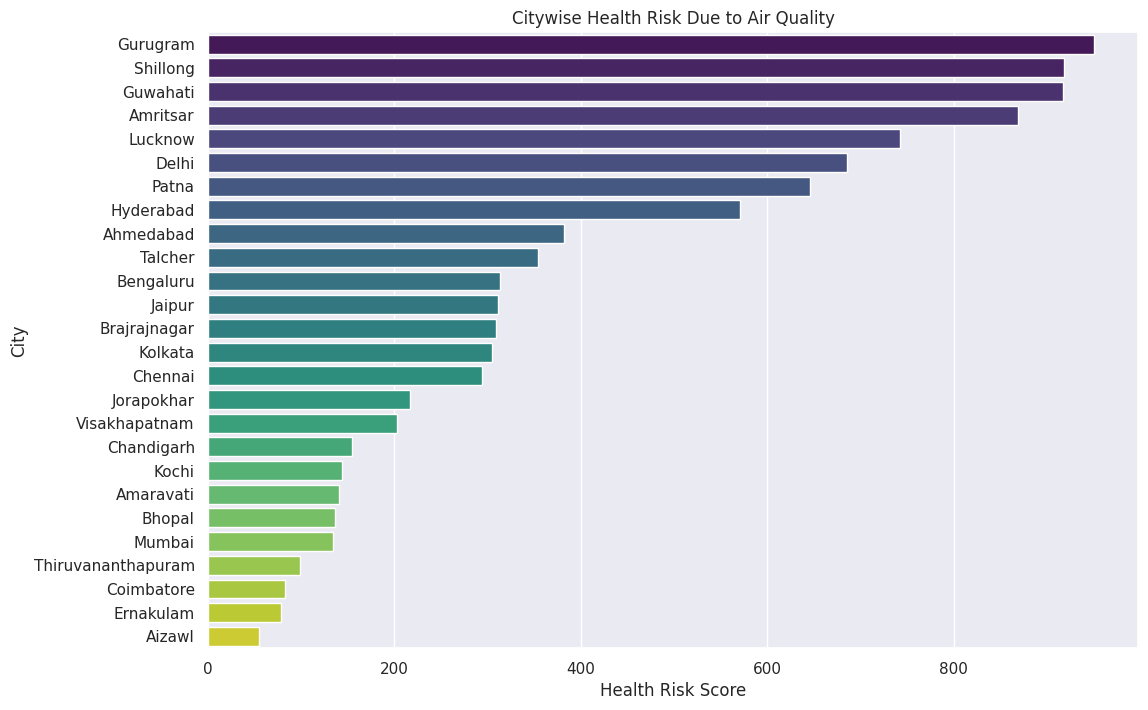

In [115]:
# Plot a bar chart of the cities with the highest health risks
plt.figure(figsize=(12, 8))
sns.barplot(x='max_health_risk', y='City', data=citywise_analysis, palette='viridis')
plt.title('Citywise Health Risk Due to Air Quality')
plt.xlabel('Health Risk Score')
plt.ylabel('City')
plt.show()


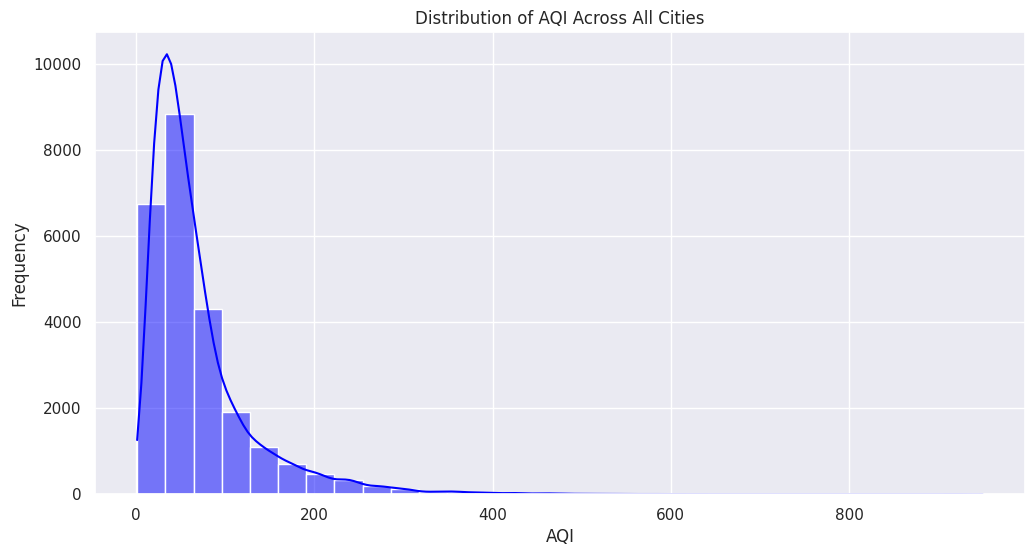

In [116]:
# Plot the distribution of AQI across cities
plt.figure(figsize=(12, 6))
sns.histplot(data['AQI'], bins=30, kde=True, color='blue')
plt.title('Distribution of AQI Across All Cities')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

In [118]:
# Print the cities with the highest health risk
top_cities = citywise_analysis.head(10)
print("Top Cities with Highest Health Risks Due to Air Quality:")
print(top_cities[['City', 'max_health_risk', 'avg_aqi']])


Top Cities with Highest Health Risks Due to Air Quality:
         City  max_health_risk     avg_aqi
12   Gurugram           949.99  117.934302
22   Shillong           917.77   31.119959
13   Guwahati           916.67   63.942196
3    Amritsar           868.66   56.553724
19    Lucknow           742.67  109.943765
10      Delhi           685.36  118.065650
21      Patna           645.50  127.613513
14  Hyderabad           571.02   48.738482
0   Ahmedabad           381.69   88.494185
23    Talcher           354.44   65.717220
